In [1]:
import bandit as b

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [36]:
numArms = 5
neuronsPerArm = 2
tEpoch = 128
epochs = 20
probabilities = [0, 0, 100, 0, 0]
weights = 1 * np.ones(5, dtype='int')

In [37]:
bandito = b.bandit(numArms, neuronsPerArm, tEpoch, epochs, probabilities=probabilities, weights=weights)
(x,y,z) = bandito.run(epochs)
bandito.stop()

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.103:42315
INFO:DRV:      Host server up..............Done 0.19s
INFO:DRV:      Encoding axons/synapses.....Done 7.49ms
INFO:DRV:      Compiling Embedded snips....Done 0.40s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1574122298.1447852/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=2 
INFO:DRV:      Booting up..................Done 2.63s
INFO:DRV:      Encoding probes.............Done 0.92ms
INFO:HST:  Lakemont_driver...
INFO:DRV:      Transferring probes.........Done 3.93ms
INFO:DRV:      Transferring spikes.........Done 2.19ms
INFO:DRV:      Configuring registers.......Done 0.03s
INFO:DRV:      Executing...................Done 0.36s
INFO:DRV:      Processing timeseries.......Done 0.46s
INFO:DRV:  Executor: 2560 timesteps........Done 0.87s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [38]:
p = bandito.get_reward_probes()

In [39]:
lrs = [arm.learningRule for arm in bandito.arms]

In [40]:
[lr.id for lr in lrs]

[0, 1, 2, 3, 4]

In [41]:
x,y

([1, 3, 1, 3, 0, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
z

array([[25, 25, 25, 25, 25],
       [23, 23, 23, 23, 23],
       [18, 18, 18, 18, 18],
       [14, 14, 14, 14, 14],
       [19, 19, 19, 19, 19],
       [17, 17, 17, 17, 17],
       [15, 15, 15, 15, 15],
       [19, 19, 20, 19, 19],
       [19, 19, 21, 19, 19],
       [22, 22, 22, 22, 22],
       [16, 16, 17, 16, 16],
       [24, 24, 29, 24, 24],
       [19, 19, 25, 19, 19],
       [17, 17, 27, 17, 17],
       [23, 23, 32, 23, 23],
       [20, 20, 36, 20, 20],
       [15, 15, 26, 15, 15],
       [20, 20, 24, 20, 20],
       [22, 22, 28, 22, 22],
       [17, 17, 33, 17, 17]])

In [44]:
z

array([[25, 25, 25, 25, 25],
       [23, 23, 23, 23, 23],
       [18, 18, 18, 18, 18],
       [14, 14, 14, 14, 14],
       [19, 19, 19, 19, 19],
       [17, 17, 17, 17, 17],
       [15, 15, 15, 15, 15],
       [19, 19, 20, 19, 19],
       [19, 19, 21, 19, 19],
       [22, 22, 22, 22, 22],
       [16, 16, 17, 16, 16],
       [24, 24, 29, 24, 24],
       [19, 19, 25, 19, 19],
       [17, 17, 27, 17, 17],
       [23, 23, 32, 23, 23],
       [20, 20, 36, 20, 20],
       [15, 15, 26, 15, 15],
       [20, 20, 24, 20, 20],
       [22, 22, 28, 22, 22],
       [17, 17, 33, 17, 17]])

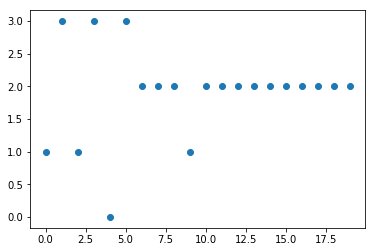

In [48]:
plt.scatter(np.arange(len(x)), x)

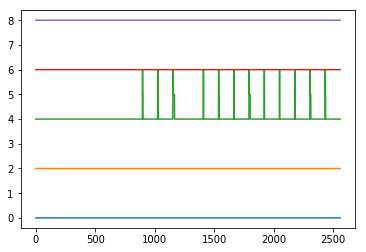

In [49]:
for i in range(numArms):
    data = np.array(p[i][0].data)
    shape = data.shape
    plt.plot((data + np.ones(shape)*2*i))

In [50]:
ws = bandito.get_weights()

In [51]:
ws.shape

(5, 2, 2560)

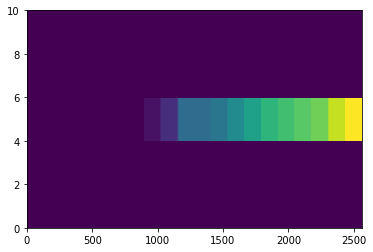

In [52]:
plt.pcolor(np.concatenate(ws, axis=0))